In [2]:
# Load reuqired packages
import wetwin
import solara
import ipywidgets as widgets
from datetime import *
import pandas as pd
import numpy as np
import zarr
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
#plt.rcParams['figure.figsize'] = [15, 8]

In [3]:
# Open online dataset of the Rhine-Meuse delta
map_url="https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/zunormm_dischargeScenario/ZUNO_highQ_map_3d.zarr"
map=xr.open_zarr(map_url,consolidated=True)
#map
map.dims

Frozen({'time': 361, 'z': 45, 'y': 499, 'x': 999, 'mesh2d_nLayers': 45})

In [ ]:
layer = solara.reactive(44)
time = solara.reactive(22)

@solara.component
def MapPlot(map):
    ilayer=layer.value #current layer
    itime=time.value #current time
    # Get data for current plot
    x=map.x_center[:]
    y=map.y_center[:]
    sal_slice=map.salinity.isel(time=itime,z=ilayer,drop=True)
    sal_data=sal_slice.values
    t0,dt,ntimes=wetwin.dataset_get_python_times(map)
    # Plot data
    fig = Figure() #This is a matplotlib figure, and not a matplotlib.pyplot figure
    ax = fig.subplots()
    print(f'Plotting salinity at t={t0+dt*itime} layerl={ilayer}')
    ax.pcolormesh(x,y,sal_data)
    print('After pcolormesh')
    #fig.colorbar()
    ax.set_title(f'Salinity at t={t0+dt*itime} layer={ilayer}')
    return solara.FigureMatplotlib(fig)

@solara.component
def Page():
    t0,dt,ntimes=wetwin.dataset_get_python_times(map)
    with solara.Column(style={"min-width": "500px"}) as main:
        wetwin.SliderDateTime(label="",value=time,tstart=t0,ntimes=ntimes,tstep=dt,skip_steps=6)
        solara.SliderInt(label="Layer",value=layer, min=0, max=44)
        #solara.Select(label="Location", value=location, values=locations)
        print('Before MapPlot')
        MapPlot(map)
        print('After MapPlot')
        solara.Text(f"Layer: {layer.value} ")
    print('After main')
    return main

# The following line is required only when running the code in a Jupyter notebook:
Page()

Plotting salinity at t=2022-06-03 06:00:00 layerl=44


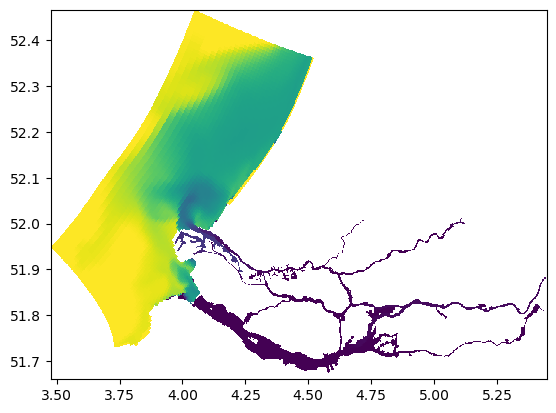

In [5]:
# Straightforward plot of the data - for comparison of speed
ilayer=44 #current layer
itime=27 #current time
# Get data for current plot
x=map.x_center[:]
y=map.y_center[:]
sal_slice=map.salinity.isel(time=itime,z=ilayer,drop=True)
sal_data=sal_slice.values
t0,dt,ntimes=wetwin.dataset_get_python_times(map)
# Plot data
print(f'Plotting salinity at t={t0+dt*itime} layerl={ilayer}')
plt.pcolormesh(x,y,sal_data)
